<a href="https://colab.research.google.com/github/AlejandroSenabre/Data-Analysis-with-SQL/blob/main/BikeStore_with_SQL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

En este proyecto, se utilizará SQL para analizar datos desde Python usando sqlite3, una biblioteca que permite interactuar con bases de datos SQLite desde Python. El objetivo es demostrar la potencia y versatilidad de SQL como herramienta para el análisis de datos, así como las ventajas de combinarlo con Python y SQLite. Se realizarán las siguientes tareas:

- Importar y limpiar datos desde archivos CSV a tablas SQLite
- Realizar consultas SQL para seleccionar, filtrar, agrupar y ordenar datos
- Usar funciones de agregación, operadores lógicos y cláusulas JOIN para obtener información relevante de los datos
- Graficar los resultados usando la biblioteca matplotlib de Python
- Concluir con las principales observaciones y recomendaciones derivadas del análisis

In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
sns.set()

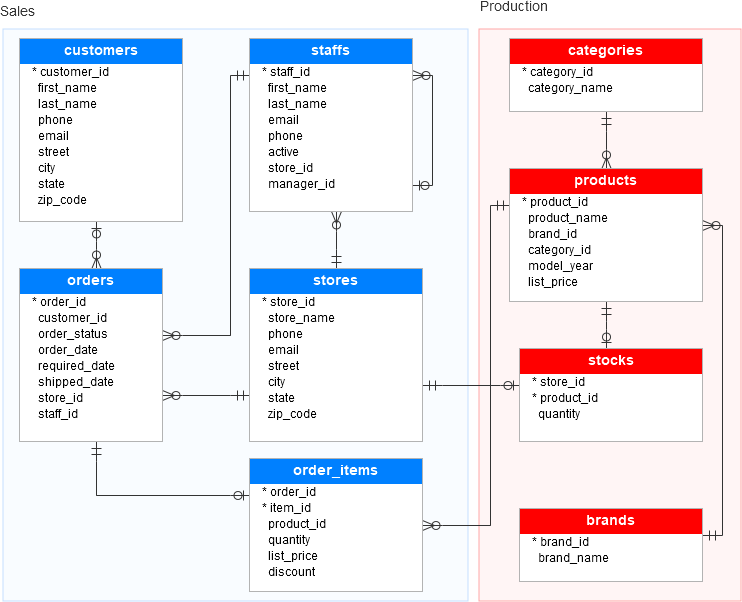

El Diagrama de tablas original estaba pensado para que esté distribuido en dos bases de datos distintas ("Sales" "Production") pero para simplificar la operatoria se lo subira todo a una unica base de datos llamada "bike_store".

In [3]:
# Cargamos los datos de la URL como un DataFrame de Pandas
brands=pd.read_csv('https://raw.githubusercontent.com/AlejandroSenabre/Data-Analysis-with-SQL/main/Table/brands.csv')
categories=pd.read_csv('https://raw.githubusercontent.com/AlejandroSenabre/Data-Analysis-with-SQL/main/Table/categories.csv')
customers=pd.read_csv('https://raw.githubusercontent.com/AlejandroSenabre/Data-Analysis-with-SQL/main/Table/customers.csv')
order_items = pd.read_csv('https://raw.githubusercontent.com/AlejandroSenabre/Data-Analysis-with-SQL/main/Table/order_items.csv')
orders = pd.read_csv('https://raw.githubusercontent.com/AlejandroSenabre/Data-Analysis-with-SQL/main/Table/orders.csv')
products = pd.read_csv('https://raw.githubusercontent.com/AlejandroSenabre/Data-Analysis-with-SQL/main/Table/products.csv')
staffs = pd.read_csv('https://raw.githubusercontent.com/AlejandroSenabre/Data-Analysis-with-SQL/main/Table/staffs.csv')
stocks = pd.read_csv('https://raw.githubusercontent.com/AlejandroSenabre/Data-Analysis-with-SQL/main/Table/stocks.csv')
stores = pd.read_csv('https://raw.githubusercontent.com/AlejandroSenabre/Data-Analysis-with-SQL/main/Table/stores.csv')

In [4]:
# Create database connection
connection = sqlite3.connect('bike_store.db')

# Insert data into database
brands.to_sql('brands', connection, if_exists='replace', index=False)
categories.to_sql('categories', connection, if_exists='replace', index=False)
customers.to_sql('customers', connection, if_exists='replace', index=False)
order_items.to_sql('order_items', connection, if_exists='replace', index=False)
orders.to_sql('orders', connection, if_exists='replace', index=False)
products.to_sql('products', connection, if_exists='replace', index=False)
staffs.to_sql('staffs', connection, if_exists='replace', index=False)
stocks.to_sql('stocks', connection, if_exists='replace', index=False)
stores.to_sql('stores', connection, if_exists='replace', index=False)

3

In [13]:
rows_cols = [] #Lista vacia
for df in dfs:
  rows_cols.append([df, eval(df).shape[0], eval(df).shape[1]])  #rellena la lista
#Convierte la lista en df
df_rows_cols = pd.DataFrame(rows_cols, columns=['Tabla', 'Filas', 'Columnas'])
#Imprime
print(tabulate(df_rows_cols, headers='keys', tablefmt='psql'))

+----+-------------+---------+------------+
|    | Dataframe   |   Filas |   Columnas |
|----+-------------+---------+------------|
|  0 | brands      |       9 |          2 |
|  1 | categories  |       7 |          2 |
|  2 | customers   |    1445 |          9 |
|  3 | order_items |    4722 |          6 |
|  4 | orders      |    1615 |          8 |
|  5 | products    |     321 |          6 |
|  6 | staffs      |      10 |          8 |
|  7 | stocks      |     939 |          3 |
|  8 | stores      |       3 |          8 |
+----+-------------+---------+------------+


##Querys Basicas


###SELECT

El `SELECT `se utiliza para seleccionar los datos que queramos provenientes de una tabla. La sintaxis es:  
 `SELECT columna1, columna2, ... FROM nombre_tabla;`   

 Si en vez de indicar la columnas lo reemplazamos por un `*` seleccionará todos los datos de la tabla.

 En el siguiente ejemplo se mostrarán todos los datos que se encuentran en la tabla "categories":

In [26]:
query = """
SELECT * FROM categories;
"""
df=pd.read_sql_query(query, connection)
df

,category_id,category_name
0,1,Children Bicycles
1,2,Comfort Bicycles
2,3,Cruisers Bicycles
3,4,Cyclocross Bicycles
4,5,Electric Bikes
5,6,Mountain Bikes
6,7,Road Bikes


Agregando los siguientes campos podemos modificar el resultado extraido:
- `SELECT DISNTICT` Nos traerá los valores unicos que le pidamos, es decir, que no haya repetidos.
- `LIMIT` : Con LIMIT nos da la posiblidad de limitar los resultados obtenidos, es de gran ayuda si es una tabla con gran cantidad de datos y evitamos utilizar muchos recursos al traer todos los datos.
- `OFFSET` : Simplemente para omitir las filas que le indiquemos.

In [37]:
query = """
SELECT DISTINCT model_year from products;
"""
df=pd.read_sql_query(query, connection)
df

,model_year
0,2016
1,2017
2,2018
3,2019


In [43]:
query = """
SELECT DISTINCT product_name, brand_id from products LIMIT 6 OFFSET 10;
"""
df=pd.read_sql_query(query, connection)
df

,product_name,brand_id
0,Surly Straggler 650b - 2016,8
1,Electra Townie Original 21D - 2016,1
2,Electra Cruiser 1 (24-Inch) - 2016,1
3,Electra Girl's Hawaii 1 (16-inch) - 2015/2016,1
4,Electra Moto 1 - 2016,1
5,Electra Townie Original 7D EQ - 2016,1


###WHERE
La clausula **WHERE** se utiliza para filtrar registros. Solamente va a extraer los registros que cumplan con la condición especifica.  
Un ejemplo `SELECT * FROM order_items WHERE list_price > 3000;` que nos traerá todos los datos que cumplan la condición de que en la columna "list_price" posean un valor mayor a 3000.

También la podemos acompañar con los siguientes operadores:
- **OR** : Mostrará los registros si alguna de las condiciones es verdadera.
  - Ejemplo: `SELECT * FROM clientes WHERE ciudad = 'Madrid' OR ciudad = 'Barcelona';`
- **AND** : Mostrará los registros si todas las condiciones son verdaderas.
  - Ejemplo: `SELECT * FROM pedidos WHERE estado = 'En curso' AND fecha_pedido > '2023-12-01';`
- **NOT** : Muestra los que no cumplen con la condición.
  - Ejemplo: `SELECT * FROM productos WHERE precio NOT BETWEEN 100 AND 200;`
- **BETWEEN a AND b** : Mostrará los valores que se encuentran entre ambos valores.  
  - Ejemplo: `SELECT * FROM clientes WHERE edad BETWEEN 18 AND 30;`
- **IN** : Permite seleccionar registros que coincidan con uno o más valores de una lista.
  - Ejemplo: `SELECT * FROM productos WHERE categoria IN ('Ropa', 'Electrónica');`
- **LIKE** : Permite realizar búsquedas con comodines.
  - Ejemplo: `SELECT * FROM clientes WHERE nombre LIKE '%García%';`

In [110]:
query = """
SELECT * from order_items
  WHERE list_price > 5000
  AND item_id = 4
  AND discount < 0.10
  OR list_price < 100 AND NOT quantity = 2;
"""
df=pd.read_sql_query(query, connection)
df


,order_id,item_id,product_id,quantity,list_price,discount
0,645,4,47,2,5299.99,0.07
1,741,4,56,2,5499.99,0.05
2,1179,4,50,1,5999.99,0.07
3,1226,4,51,1,6499.99,0.07
4,1425,2,263,1,89.99,0.07
5,1439,2,263,1,89.99,0.20
6,1439,4,149,1,7499.99,0.05
7,1462,1,263,1,89.99,0.20
8,1540,4,177,2,5499.99,0.05
9,1550,4,148,1,5499.99,0.07


###Agregaciones
Son funciones que realizan un cálculo sobre un conjunto de valores y devuelven un solo valor agregado. Se utilizan para obtener información sobre un conjunto de datos, como la media, la suma, el máximo o el mínimo.
  
Funciones básicas de agregación:

- COUNT: devuelve el número total de filas seleccionadas por la consulta.
- MIN: devuelve el valor mínimo del campo especificado.
- MAX: devuelve el valor máximo del campo especificado.
- SUM: suma los valores del campo especificado. Solo se puede utilizar en columnas numéricas.
- AVG: devuelve el valor promedio del campo especificado. Solo columnas numéricas.

Avanzadas:

- STDDEV: Desviación estándar de un conjunto de valores.
- VARIANCE: Varianza.
- MEDIAN: La mediana.
- MODE: Valor más frecuente de un conjunto de valores.

In [76]:
order_items
query = """
SELECT * from orders ;
"""
df=pd.read_sql_query(query, connection)
df

,order_id,customer_id,order_status,order_date,required_date,shipped_date,store_id,staff_id
0,1,259,4,2016-01-01,2016-01-03,2016-01-03,1,2
1,2,1212,4,2016-01-01,2016-01-04,2016-01-03,2,6
2,3,523,4,2016-01-02,2016-01-05,2016-01-03,2,7
3,4,175,4,2016-01-03,2016-01-04,2016-01-05,1,3
4,5,1324,4,2016-01-03,2016-01-06,2016-01-06,2,6
...,...,...,...,...,...,...,...,...
1610,1611,6,3,2018-09-06,2018-09-06,None,2,7
1611,1612,3,3,2018-10-21,2018-10-21,None,1,3
1612,1613,1,3,2018-11-18,2018-11-18,None,2,6
1613,1614,135,3,2018-11-28,2018-11-28,None,3,8


In [92]:
order_items
query = """
SELECT COUNT(*) AS "Cantidad ventas ENE/16",
  MIN(customer_id) AS "Id minimo",
  MAX(customer_id) AS "Id Maximo"
FROM orders
WHERE order_date < '2016-01-31';
"""
df=pd.read_sql_query(query, connection)
df

,Cantidad ventas ENE/16,Id minimo,Id Maximo
0,48,57,1434


In [116]:
query = """
SELECT Ventas, Descuento, (Ventas - Descuento) AS Neto, Ventas_Neta_Media
FROM (
  SELECT SUM(order_items.list_price * order_items.quantity) AS Ventas,
    SUM(order_items.list_price * order_items.quantity * order_items.discount) AS Descuento,
    AVG(order_items.list_price * order_items.quantity * order_items.discount) AS Ventas_Neta_Media
  FROM order_items
  LEFT JOIN orders ON orders.order_id = order_items.order_id
  WHERE orders.order_date < '2016-01-31'
) AS sub;
"""
df=pd.read_sql_query(query, connection)
df


,Ventas,Descuento,Neto,Ventas_Neta_Media
0,237904.22,25757.9332,212146.2868,180.125407
